In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random

# para gerar o grafico no browser
%matplotlib inline
!git clone http://github.com/rodolfojbrandao/PHD
%cd PHD

# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x
  
# chama a rede
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                       hidden_layer_sizes=(i),random_state=j)
    return clf

Melhor=1e99
N=5 #i numero de neuronios
M=5 #j
O=5 #k


for k in range(0,O):
  # leitura dos dados
  DAT=pd.read_csv("ReposeAngleANN.csv")

  # separa as colunas de interesse
  Index=[0,1,2,3,4,5,6,7,8,9]
  Dat_Select=[]
  Dat_Select=DAT.iloc[:,Index].copy()

  # separa os dados em normatizados e originais
  DAT_OLD=[]
  DAT_OLD=Dat_Select.copy()
  DAT=Normatiza(Dat_Select)
  
  # separa os dados em treino e teste
  train=[]
  test=[]
  train=DAT.sample(frac=0.8,random_state=k).copy()
  test=DAT.drop(train.index).copy()
  
  # obtem as variaveis independentes (treino e teste)
  x_train=train.iloc[:,[0,1,2,3,4,5,6,7]]
  x_test=test.iloc[:,[0,1,2,3,4,5,6,7]]
  X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4,5,6,7]]

  # obtem as variaveis dependentes (treino e teste)
  Index=[9]
  y_train=train.iloc[:,Index]
  y_test=test.iloc[:,Index]
  Y_OLD=DAT_OLD.iloc[:,Index]
  test=Original(y_test,Y_OLD)
  resist_obs_test=[]
  resist_obs_train=[]
  resist_obs_test=test['Superior'].copy()
  for i in range(1,N):
      for j in range(0,M):
          col_names=list(y_train)
          clf=rede(i,j)
          clf.fit(x_train, y_train)
          y_calc_train=[]
          y_calc_test=[]
          y_calc_train=clf.predict(x_train)
          y_calc_test=clf.predict(x_test)
          y_calc_train=pd.DataFrame(y_calc_train)
          y_calc_test=pd.DataFrame(y_calc_test)
          y_calc_train.columns = col_names
          y_calc_test.columns = col_names
          y_calc_train=Original(y_calc_train,Y_OLD)
          y_calc_test=Original(y_calc_test,Y_OLD)
          resist_calc_train=[]
          resist_calc_test=[]
          resist_calc_train=y_calc_train['Superior'].copy()
          resist_calc_test=y_calc_test['Superior'].copy()
          mse=mean_squared_error(resist_obs_test,resist_calc_test)
          R2_teste=r2_score(resist_obs_test,resist_calc_test)
          #print("Neuronios=",i,"Seed=",j,"MSE teste=",mse,"R^2 teste=",R2_teste)
          if(mse<Melhor):
              Melhor=mse.copy()
              ix=i
              jx=j
              R2r=R2_teste
              seed_sample = k
              resist_obs_train_top=Original(y_train,Y_OLD)
              resist_calc_train_top = resist_calc_train.copy()
              resist_obs_test_top = resist_obs_test.copy()
              resist_calc_test_top = resist_calc_test.copy()

mse=mean_squared_error(resist_obs_train_top,resist_calc_train_top)
R2=r2_score(resist_obs_train_top,resist_calc_train_top)

print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"Seed_sample",seed_sample,"MSE teste=",Melhor,"R^2 teste=",R2r,"MSE treino=",mse,"R^2 treino=",R2)

Cloning into 'PHD'...
remote: Enumerating objects: 4205, done.
remote: Counting objects: 100% (4205/4205), done.
remote: Compressing objects: 100% (3838/3838), done.
remote: Total 4205 (delta 339), reused 4183 (delta 322), pack-reused 0
Receiving objects: 100% (4205/4205), 53.77 MiB | 20.94 MiB/s, done.
Resolving deltas: 100% (339/339), done.
Checking out files: 100% (4036/4036), done.
/content/PHD


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Melhor resposta:
Neuronios= 2 Seed= 1 Seed_sample 3 MSE teste= 0.3050418533508029 R^2 teste= 0.9225530689649432 MSE treino= 0.5009057532030721 R^2 treino= 0.8834169715513427


In [2]:
print(Y_OLD.head())
print(DAT.head())
print(test.head())

   Superior
0    20.785
1    21.535
2    21.455
3    22.405
4    22.310
          D       Rho      Mspp      Mrpp      Mspw      Mrpw       Epp  \
0 -0.486704 -0.486703 -0.486703 -0.486697 -0.486703 -0.486697  0.486703   
1 -0.486704 -0.486703 -0.486703 -0.486697 -0.486703  0.486697  0.486703   
2 -0.486704 -0.486703 -0.486703 -0.486697  0.486703 -0.486697  0.486703   
3 -0.486704 -0.486703 -0.486703 -0.486697  0.486703  0.486697  0.486703   
4 -0.486704 -0.486703 -0.486703  0.486697 -0.486703 -0.486697 -0.486703   

        Epw  Inferior  Superior  
0  0.486703 -0.366247 -0.297951  
1 -0.486703 -0.288665 -0.140305  
2 -0.486703 -0.119395 -0.157120  
3  0.486703 -0.309824  0.042564  
4  0.486703  0.074055  0.022596  
    Superior
1     21.535
9     24.365
36    22.390
38    21.430
44    24.465


In [3]:
print(resist_obs_test_top.head())
print(resist_calc_test_top.head())
print('============================================')
print(resist_obs_train_top.head())
print(resist_calc_train_top.head())

0     20.785
3     22.405
10    25.270
14    24.980
19    21.645
Name: Superior, dtype: float64
0    20.886482
1    22.717545
2    24.658696
3    25.762023
4    21.733444
Name: Superior, dtype: float64
    Superior
12    24.000
17    19.830
6     22.595
36    22.390
32    19.955
0    24.460757
1    20.758977
2    22.879563
3    21.759309
4    19.283971
Name: Superior, dtype: float64


In [0]:
col_names=list(resist_obs_test_top)
#resist_obs_train_top.columns=col_names
resist_obs_train_top.columns=['Superior']
#resist_calc_train_top.columns=col_names
resist_calc_train_top.columns=['Superior']

In [5]:
print(resist_calc_train_top)

0     24.460757
1     20.758977
2     22.879563
3     21.759309
4     19.283971
5     19.861410
6     22.988566
7     23.701048
8     22.905343
9     25.824200
10    24.657982
11    24.844840
12    20.803738
13    21.846860
14    20.011639
15    21.029660
16    23.563729
17    22.336642
18    25.065002
19    24.706362
20    26.097024
21    24.783961
22    22.360023
23    22.936435
24    23.544415
25    23.423672
26    19.072922
27    25.141314
28    24.350689
29    22.569486
        ...    
35    18.699001
36    18.725692
37    22.954796
38    20.790241
39    23.732685
40    24.003030
41    23.130009
42    24.492478
43    25.319998
44    25.710590
45    26.181299
46    23.179570
47    26.492054
48    21.180059
49    24.766321
50    24.290437
51    24.054815
52    24.195673
53    23.762356
54    21.134718
55    25.399932
56    22.781391
57    23.403014
58    23.169604
59    20.978495
60    21.911968
61    23.284818
62    25.797682
63    20.880411
64    22.837384
Name: Superior, Length: 

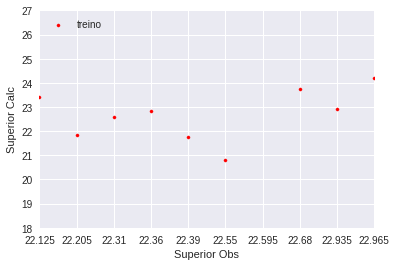

In [16]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 
ax1.scatter(resist_obs_train_top,resist_calc_train_top, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.ylim(18, 27)
plt.xlim(18,27)
plt.show()

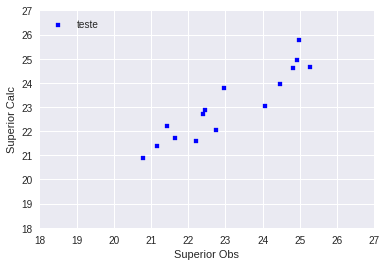

In [17]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 
ax1.scatter(resist_obs_test_top,resist_calc_test_top, s=10, c='b', marker="s", label='teste')
plt.legend(loc='upper left')
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.ylim(18, 27)
plt.xlim(18,27)
plt.show()